# Circonferenza Julia


Versione di Giuseppe Santorelli

In [1]:
using PyPlot

In [2]:
A=[0 1 0 0.552284 1 0 1 0.552284 0 1 0 0]

1×12 Array{Float64,2}:
 0.0  1.0  0.0  0.552284  1.0  0.0  1.0  0.552284  0.0  1.0  0.0  0.0

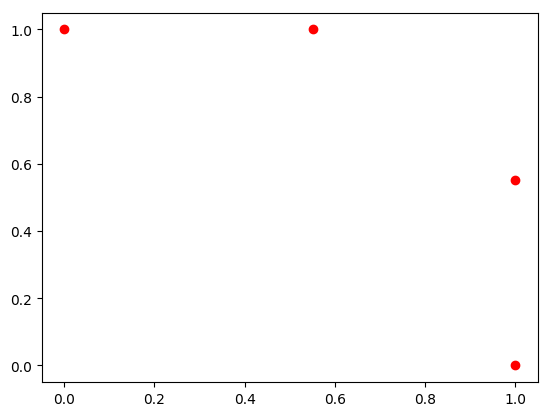

In [3]:
for i in range(1,3,4)
    plot(A[i],A[i+1],"ro")
end

In [4]:
function knot(n::Int64,c::Int64)
    
    nplusc=n+c
    nplus2=n+2
    x=Array{Float64}(nplusc)
    
    x[1]=0
    
    for i=2:nplusc
        if i>c && i<nplus2
            x[i]=x[i-1]+1
        else
            x[i]=x[i-1]
        end
    end
    return x
end

knot (generic function with 1 method)

In [8]:
function basis(c::Int64,t::Float64,npts::Int64,x::Array{Float64})
    
    n = zeros(Float64,1,36)
    nplusc = npts+c
    temp = Array{Float64}(36)
    
    #calculate the first order basis functions n[i][1]
    for i=1:nplusc-1
        if t>=x[i] && t<x[i+1]
            temp[i]=1
        else
            temp[i]=0
        end
    end
    
    #calculate the higher order basis functions
    for k=2:c
        for i=1:nplusc-k
            if temp[i]!=0
                d=((t-x[i])*temp[i])/(x[i+k-1]-x[i])
            else
                d=0
            end
            if temp[i+1]!=0
                e=((x[i+k]-t)*temp[i+1])/(x[i+k]-x[i+1])
            else
                e=0
            end
            temp[i]=d+e
        end
    end
    
    if t==x[nplusc]
        temp[npts]=1
    end
    
    #put in n array
    for i=1:npts
        n[1,i]=temp[i]
    end
    if t==x[nplusc]
        n[1,npts]=1
    end
    return n[1,1:npts]
end   

basis (generic function with 1 method)

In [9]:
function bspline(npts::Int64,c::Int64,p1::Int64,b::Array{Float64})
    
    nplusc=npts+c
    p=Array{Float64}(3*p1)
    
    x=knot(npts,c)
    
    icount=0
    t=0.
    
    step=x[nplusc]/(p1-1)
    
    for i1=1:p1
        if x[nplusc]-t<5e-6
            t=x[nplusc]
        end
        
        nbasis=basis(c,t,npts,x)
        
        for j=1:3
            jcount=j
            p[icount+j]=0
            for i=1:npts
                temp=nbasis[i]*b[jcount]
                p[icount+j]=p[icount+j]+temp
                jcount=jcount+3
            end
        end
        
        icount=icount+3
        t=t+step
    end
    
    return p
end

bspline (generic function with 1 method)

In [10]:
curve=bspline(4,3,100,A)

300-element Array{Float64,1}:
 0.0      
 1.0      
 0.0      
 0.0221805
 0.999909 
 0.0      
 0.0440929
 0.999635 
 0.0      
 0.0657372
 0.999178 
 0.0      
 0.0871134
 ⋮        
 0.999178 
 0.0657372
 0.0      
 0.999635 
 0.0440929
 0.0      
 0.999909 
 0.0221805
 0.0      
 1.0      
 0.0      
 0.0      

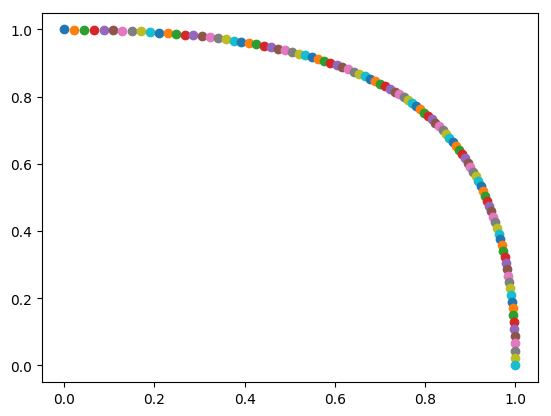

In [11]:
for i in range(1,3,100)
    plot(curve[i],curve[i+1],"o")
end

In [13]:
x=zeros(100)

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [14]:
y=zeros(100)

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [18]:
for i=1:100
    x[i]=curve[3*i-2]
end

In [19]:
for i=1:100
    y[i]=curve[3*i-1]
end

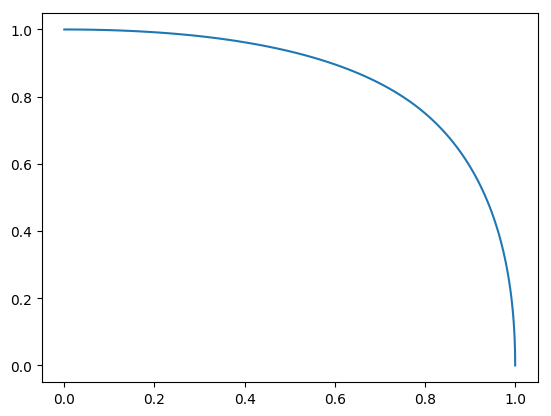

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4f505df450>

In [20]:
plot(x,y)